In [30]:
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn. metrics  import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

In [2]:
inputs, target = make_blobs(n_samples = 1000, random_state= 365, centers = [(-3,3),(0,0),(2,2)])

In [3]:
inputs.shape, target.shape

((1000, 2), (1000,))

In [4]:
data = pd.DataFrame(data= inputs, columns = ['Feature 1', 'Feature 2'])

In [5]:
data['Target'] = target

In [6]:

data

,Feature 1,Feature 2,Target
0,1.630460,2.094029,2
1,-2.811252,3.852241,0
2,0.501051,1.582531,2
3,-3.624112,3.325318,0
4,-3.278106,2.359416,0
...,...,...,...
995,-4.412271,2.420197,0
996,0.398022,-0.847863,1
997,-0.588974,0.317711,1
998,-2.328593,4.957489,0


<Axes: xlabel='Feature 1', ylabel='Feature 2'>

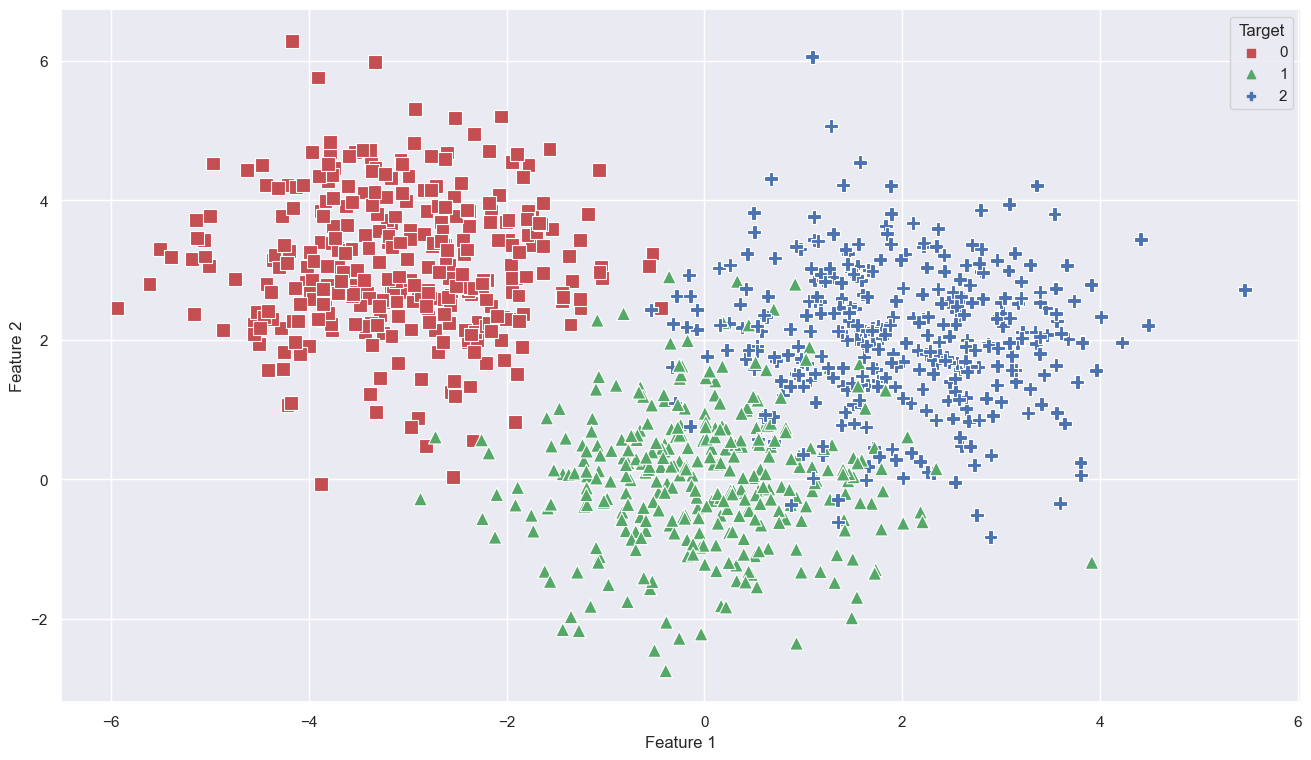

In [7]:
sns.set()

plt.figure(figsize= (16,9))


knn_palette = sns.color_palette(['r', 'g', 'b' ])
sns.scatterplot(x= 'Feature 1', y = 'Feature 2', data =data,hue = 'Target', palette= knn_palette,
               markers = [',' ,'^','P'], style = 'Target', s = 100)

In [8]:
xtrain, xtest, ytrain,ytest = train_test_split(inputs,target,
                                               test_size= 0.2,random_state=  365,
                                            stratify= target)

In [9]:
clf =  KNeighborsClassifier(n_neighbors= 30, weights = 'distance')

In [10]:
clf.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=30, weights='distance')

In [11]:
f1 = -0.18
f2 = 3.2

In [12]:
clf.predict([[f1,f2]])

array([2])

In [13]:
neighbors = clf.kneighbors([[f1,f2]])

In [14]:
neighbors

(array([[0.27086818, 0.34749744, 0.40387913, 0.45668128, 0.57370524,
         0.58002987, 0.6147827 , 0.62680551, 0.76674656, 0.77233172,
         0.78175021, 0.84541382, 0.8741025 , 0.8769993 , 0.89014688,
         0.91521046, 0.92223527, 0.99986243, 1.01649367, 1.0231371 ,
         1.03996308, 1.04075309, 1.05202214, 1.05586882, 1.10512231,
         1.14601178, 1.15303035, 1.16564948, 1.16938942, 1.16964811]]),
 array([[336, 215, 679, 221, 690, 688, 269, 309, 543, 100,  79, 161, 708,
         613, 216, 291, 561, 748, 516, 140, 514, 399,  25, 255, 431,   0,
         386, 458,   3, 304]], dtype=int64))

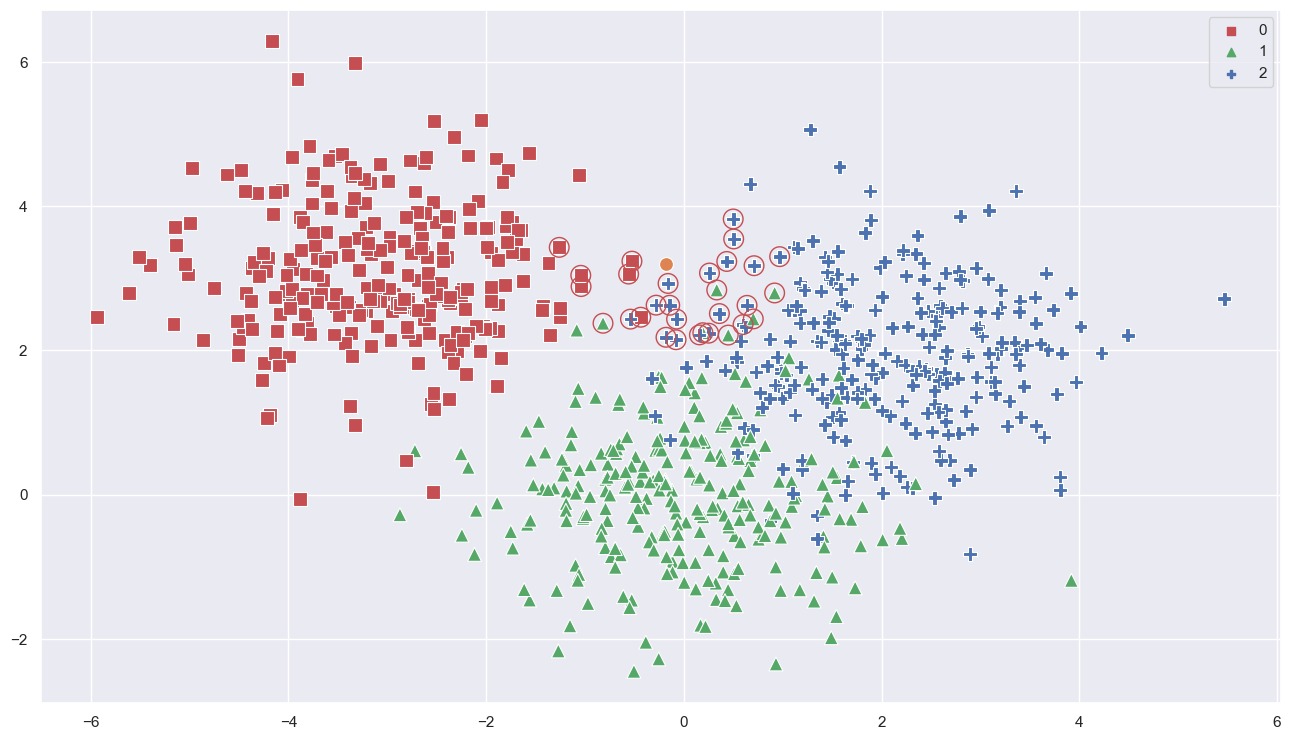

In [15]:
sns.set()

plt.figure(figsize= (16,9))


knn_palette = sns.color_palette(['r', 'g', 'b' ])
sns.scatterplot(x= xtrain[:,0], y =  xtrain[:,1],hue = ytrain, palette= knn_palette,
               markers = [',' ,'^','P'], style = ytrain, s = 100)


sns.scatterplot(x= [f1], y =  [f2], style =[f2],
               markers = ['o'],s =100, legend = False)


plotx =[]
ploty =[]

for i in neighbors[1]:
    plotx.append(xtrain[i,0])
    ploty.append(xtrain[i,1])
    
plt.scatter(plotx,ploty, s=200, facecolors ='none', edgecolors = 'r')

In [16]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 30,
 'p': 2,
 'weights': 'distance'}

Time  {round(end - start ,1)} seconds


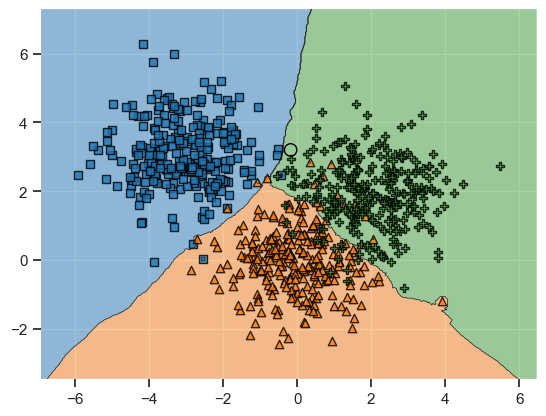

In [17]:
start = time.time()

plot_decision_regions(X = xtrain, y = ytrain, X_highlight= np.array([[f1,f2]]), clf = clf, 
                      markers = [',','^','P'],legend=0)


end = time.time()

print('Time  {round(end - start ,1)} seconds')

In [18]:
error_uniform = []
error_distance = []

k_range = range(1,50)


for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k , weights = 'uniform')
    clf.fit(xtrain,ytrain)
    predictions = clf.predict(xtest)
    error_uniform.append(1-accuracy_score(ytest, predictions))
    
    clf = KNeighborsClassifier(n_neighbors=k , weights = 'distance')
    clf.fit(xtrain,ytrain)
    predictions = clf.predict(xtest)
    error_distance.append(1-accuracy_score(ytest, predictions))

Text(0, 0.5, 'Error rate')

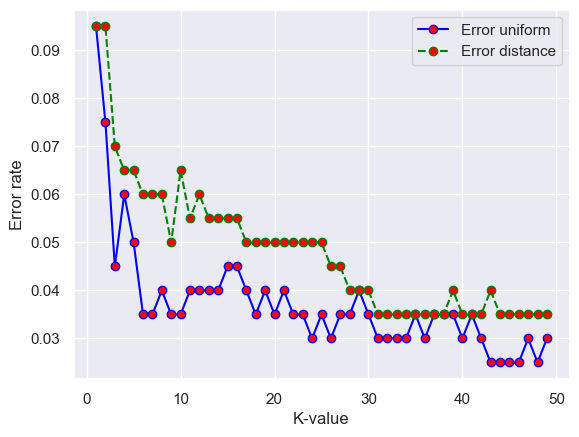

In [19]:
plt.plot(k_range, error_uniform, c= 'blue', linestyle = 'solid',
         marker = 'o', markerfacecolor = 'red',
        label = 'Error uniform')



plt.plot(k_range, error_distance, c= 'green', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red'
        ,label = 'Error distance')


plt.legend()


plt.xlabel('K-value')
plt.ylabel('Error rate')

In [21]:
param = {'n_neighbors':range(1,51), 'weights':['uniform', 'distance']}

In [22]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),param_grid= param,
                          scoring = 'accuracy')

In [23]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
grid_search.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [25]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [26]:
clf = grid_search.best_estimator_

In [27]:
clf

KNeighborsClassifier(n_neighbors=10)

In [28]:
grid_search.best_score_

0.9512499999999999

In [40]:

ytest_pre = clf.predict(xtest)

In [41]:

sns.reset_orig()
ConfusionMatrixDisplay.from_predictions(
    ytest,ytest_pre,
    labels = clf.classes_,
    cmap = 'magma')